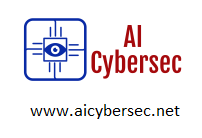

# Lesson - Regularisation Lasso & Ridge



---

### Learning Objectives 
- Learn about regularization for regression models
- Understand how regularization modifies the loss function
- Understand the effect of regularization on coefficients
- Look at the differences between the Lasso, Ridge, and ElasticNet

### Lesson Guide
- [Overview of regularization](#intro)
- [Review: the least-squares loss function](#lsq-loss)
- [The Ridge penalty](#ridge)
- [The Lasso penalty](#lasso)
- [The Elastic-Net penalty](#elastic-net)
- [What is the effect of regularization](#effect)

<a id='intro'></a>

## Overview of regularization

---

The goal of "regularizing" regression models is to structurally prevent overfitting by imposing a penalty on the coefficients of the model.

Regularization methods like the Ridge and Lasso add this additional "penalty" on the size of coefficients to the loss function. When the loss function is minimized, this additional component is added to the residual sum of squares.

In other words, the minimization becomes a trade off between fitting well and keeping the parameters small.



#### Generalization Problem in Regression


#### Before regularisation:

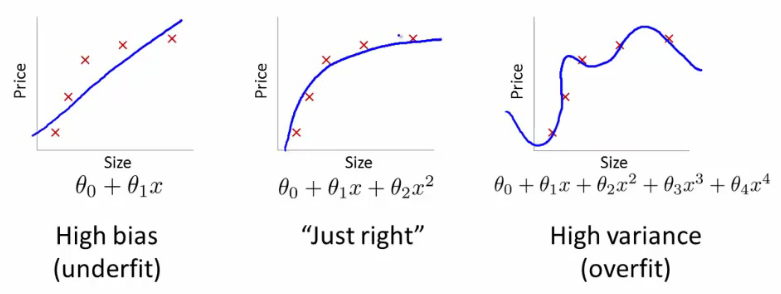

#### After regularisation:

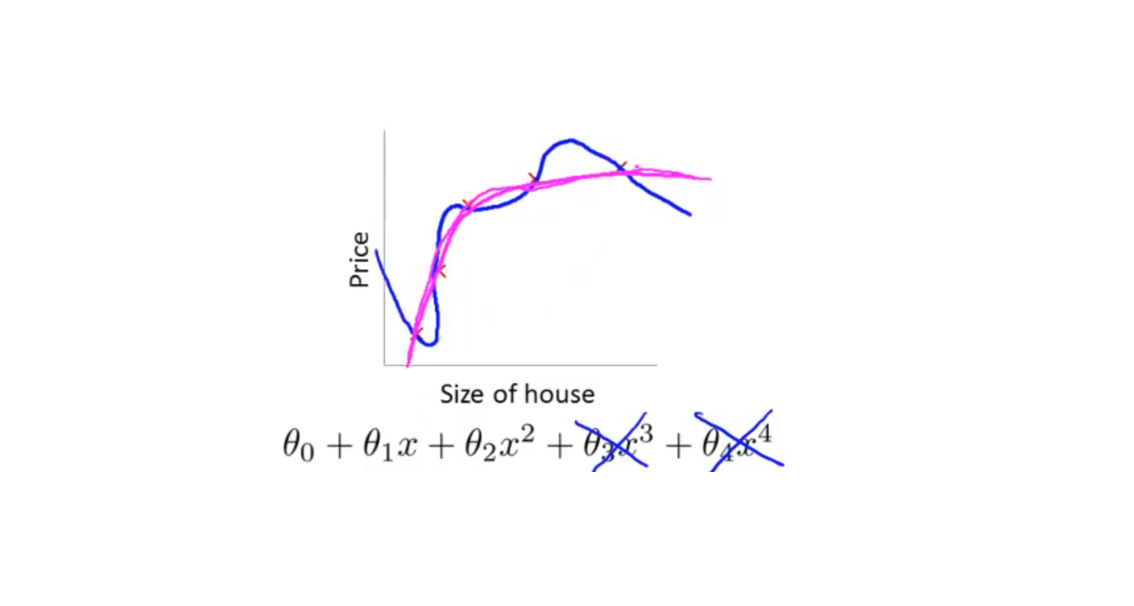
---

___

<a id='lsq-loss'></a>

## As a conclusions => 3 situations where regularisation is useful:


- Overfitting
- Curse of dimensionality
- High covariance between variables



---


The two most common types of regularization are the **Lasso**, **Ridge**. There is a mixture of them called the **Elastic Net**. We will take a look at the mathematics of regularization and the effect these penalties have on model fits.

<a id='lsq-loss'></a>

## Review: least squares loss function

---

Ordinary least squares regression minimizes the residual sum of squares (RSS) to fit the data:

$$ \text{minimize:}\; RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p x_{ij}\beta_j\right)\right)^2 $$

where our model predictions for $y$ are based on the sum of the $\beta_0$ intercept and the products of $\beta_j$ with $x_{ij}$.

Alternatively, in matrix notation using predictor matrix $X$, residual errors $\epsilon$ and vector of beta coefficients $\beta$:

$$ \text{minimize:}\; RSS = \epsilon' \epsilon = (y - X\beta)' (y - X\beta ) $$

<a id='ridge'></a>

## The Ridge penalty

---

Ridge regression adds the sum of the squared (non-intercept!) $\beta$ values to the loss function

$$ \text{minimize:}\; RSS+Ridge = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p x_{ij}\beta_j\right)\right)^2 + \lambda_2\sum_{j=1}^p \beta_j^2$$

**where**

$\beta_j^2$ is the squared coefficient for variable $x_j$.

$\sum_{j=1}^n \beta_j^2$ is the sum of these squared coefficients for every variable we have in our model. This does **not** include the **intercept $\beta_0$** (this is a convention).

$\lambda_2$ is a constant for the _strength_ of the **regularization parameter**. The higher this value, the greater the impact of this new component in the loss function. 

Question? What happen if it is equal to 0 ?

If this were, say, a billion, then the residual sum of squares component would have a much smaller effect on the loss/cost than the regularization term.

With the penalty added the RSS is referred to as the **penalized residual sum of squares (PRSS)**. In matrix format the Ridge PRSS is:

$$ \text{Ridge PRSS} = (y - X\beta)' (y - X\beta) + \lambda_2 \; ||\beta||^2_2 $$

where $||\beta||_2^2$ is the squared norm of the coefficient vector (again, excluding intercept).

The derivative we set to zero to solve for the coefficients becomes:

$$ \frac{\partial PRSS}{\partial \beta} = -2X'y + 2X'X\beta + 2\lambda_2 \beta$$

and the solution to the beta coefficient vector is:

$$ \text{Ridge }  \beta = (X'X + \lambda_2I)^{-1}X'y $$

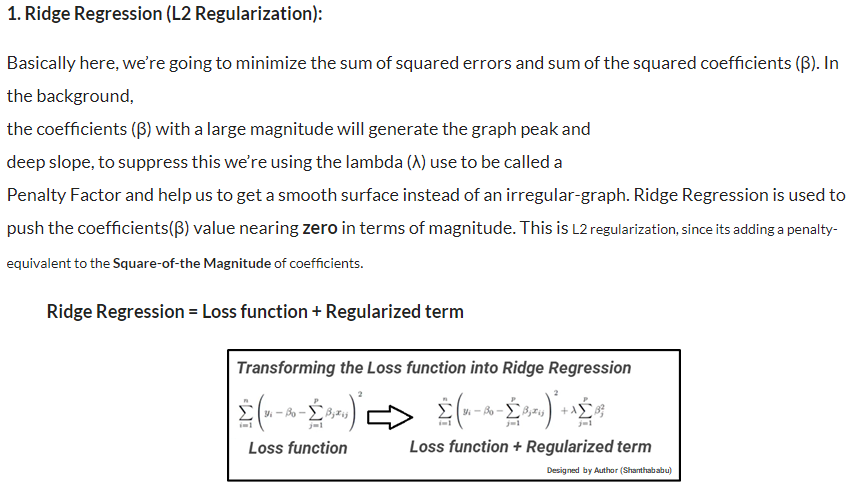

<a id='lasso'></a>

## The Lasso penalty

---

The Lasso regression takes a different approach. Instead of adding the sum of _squared_ $\beta$ coefficients to the RSS, it adds the sum of the _absolute values_ of the $\beta$ coefficients

$$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p x_{ij}\beta_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

**where**

$|\beta_j|$ is the absolute value of the $\beta$ coefficient for variable $x_j$

$\lambda_1$ is again the strength of the regularization penalty component in the loss function. In lasso the lambda is denoted with a 1, in ridge the lambda is denoted with a 2.


**In matrix format the Lasso PRSS is:**

$$ \text{Lasso PRSS} = (y - X\beta)' (y - X\beta) + \lambda_1 \; ||\beta||_1 $$

where $||\beta||_1$ is the sum of the absolute values of the coefficient vector.

Unlike the Ridge, however, there is not a closed-form solution for the Lasso beta coefficients.

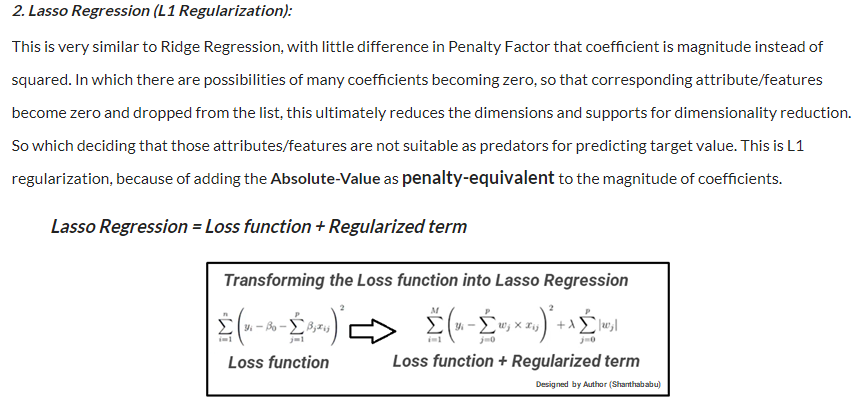

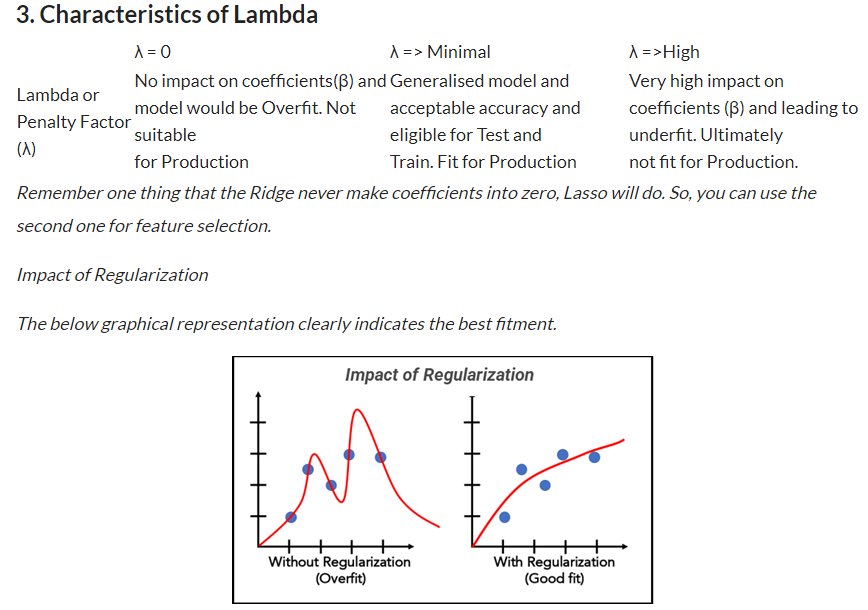

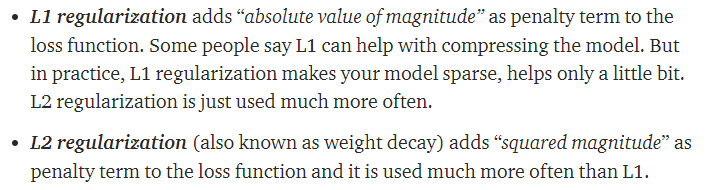

<a id='elastic-net'></a>

## Elastic Net penalty

---

Elastic Net is simply a combination of the Lasso and the Ridge regularizations. It adds *both* penalties to the loss function:

$$ \text{minimize:}\; RSS + Ridge + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_{ij}\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2$$

In the elastic net, the effect of the Ridge vs. the Lasso is balanced by the two lambda parameters. 

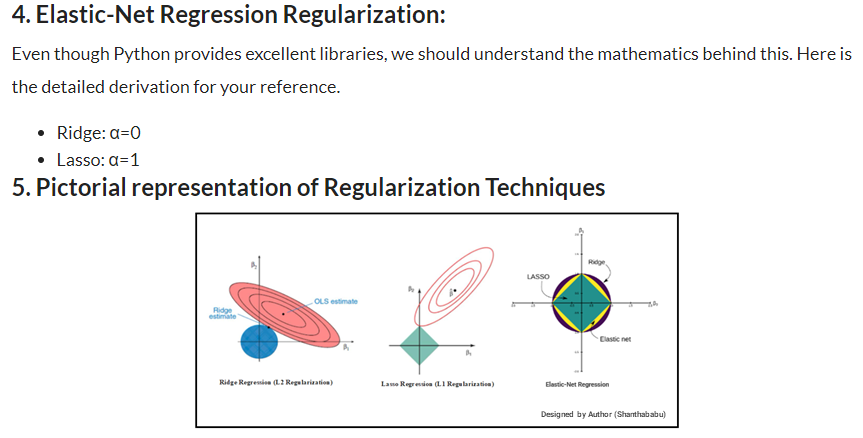

<a id='effect'></a>

## What is the effect of regularization?

---

**To demonstrate the effects we will be using a dataset on wine quality.**

An important aspect of this data, which is a reason why we might choose to use regularization, is that there is **multicollinearity** in the data. The term multicollinearity means that there are high correlations between predictor variables in your model. 

**This can lead to a variety of problems including:**
1. The effect of predictor variables estimated by your regression will **depend on what other variabes** are included in your model.
2. With very high multicollinearity, the **inverse matrix the computer calculates may not be accurate**.
3. We can no longer **interpret a coefficient on a variable** as the effect on the target of a one unit increase in that variable holding the other variables constant. This is because when predictors are strongly correlated, there is not a scenario in which one variable can change without **a conditional change** in another variable.

The Ridge is faster to compute but won't do features selection

Lasso deals well with multicollinearity between variables, but in a brutal way (it "zeroes out" the less effective variable).

The Lasso is particularly useful when you have redundant or unimportant variables. If you have **1000 variables in a dataset** the Lasso can perform "feature selection" automatically for you by forcing coefficients to be zero.